In [78]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [79]:
# Data Preparation
train_dir = 'train_data'  # Directory containing training images organized by classes
validation_dir = 'validation_data'  # Directory containing validation images organized by classes

In [80]:
# Data Preprocessing
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [81]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='categorical'
)

Found 1219 images belonging to 5 classes.


In [82]:
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=5,
    class_mode='categorical'
)

Found 307 images belonging to 5 classes.


In [83]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(os.listdir(train_dir)), activation='softmax')  # Number of classes
])

In [84]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 17, 17, 128)     

In [85]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [86]:
# Model Training
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator), 
    epochs=5,
    validation_data=validation_generator,
    validation_steps=len(validation_generator) 
)

Epoch 1/5
61/61 [==============================] - 35s 550ms/step - loss: 1.4461 - accuracy: 0.4865 - val_loss: 1.3663 - val_accuracy: 0.4984
Epoch 2/5
61/61 [==============================] - 33s 542ms/step - loss: 1.1511 - accuracy: 0.5669 - val_loss: 0.3266 - val_accuracy: 0.8893
Epoch 3/5
61/61 [==============================] - 33s 548ms/step - loss: 0.0395 - accuracy: 0.9861 - val_loss: 0.0145 - val_accuracy: 0.9967
Epoch 4/5
61/61 [==============================] - 34s 555ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 6.9371e-04 - val_accuracy: 1.0000
Epoch 5/5
61/61 [==============================] - 34s 557ms/step - loss: 0.0018 - accuracy: 0.9992 - val_loss: 5.3002e-05 - val_accuracy: 1.0000


In [87]:
# import os
# import matplotlib.pyplot as plt
# import pandas as pd

# # Load the data
# pred = pd.read_csv('TestData.csv')

# # Determine the number of groups
# num_groups = len(pred) // 72

# # Create test_data directory if it doesn't exist
# os.makedirs('test_data', exist_ok=True)

# # Plot each group separately and save as image
# for i in range(num_groups):
#     start_idx = i * 72
#     end_idx = (i + 1) * 72
#     group = pred.iloc[start_idx:end_idx]
    
#     plt.figure(figsize=(10, 4))  # Adjust figure size as needed
#     plt.plot(group['open'])
#     plt.title(f'Group {i+1}')
#     plt.xlabel('Index')
#     plt.ylabel('Open')
#     plt.grid(True)
    
#     # Save the plot as an image file
#     plot_filename = f'group_{i+1}.png'
#     plot_filepath = os.path.join('test_data', plot_filename)
#     plt.savefig(plot_filepath)
#     plt.close()  # Close the plot to release memory

# print("Plots saved in test_data directory.")

1/1 [==============================] - 0s 35ms/step
0


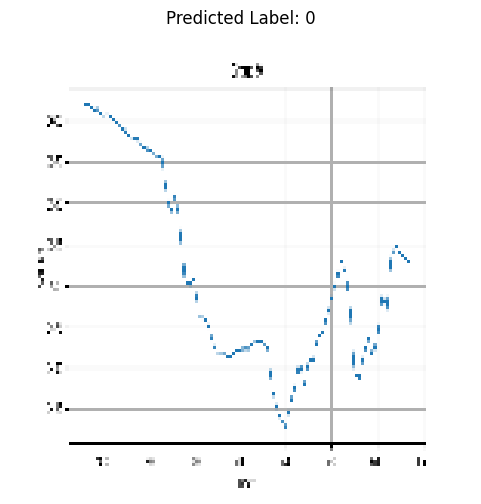

1/1 [==============================] - 0s 33ms/step
3


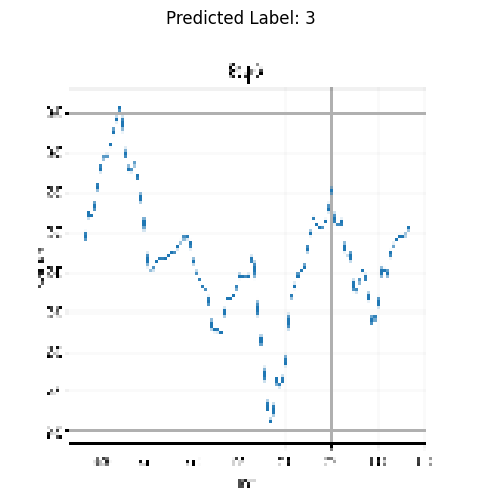

1/1 [==============================] - 0s 28ms/step
3


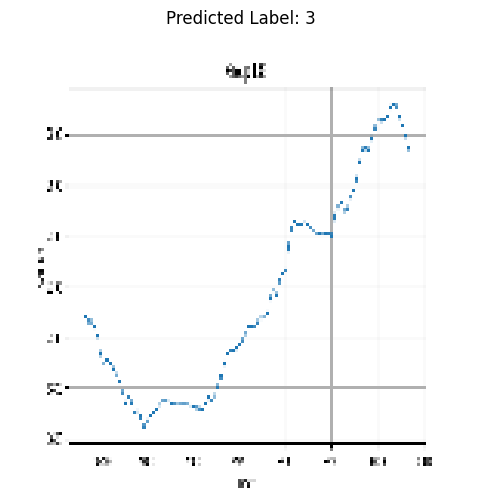

1/1 [==============================] - 0s 35ms/step
1


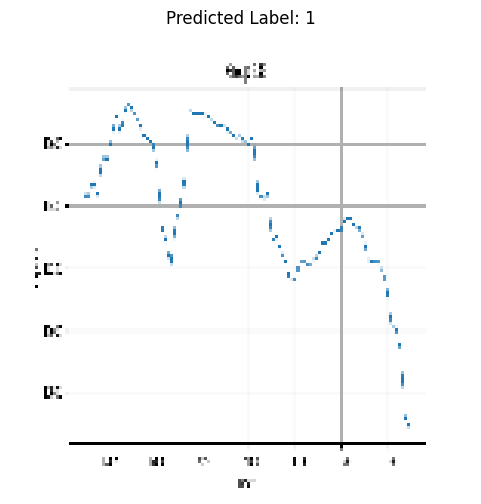

1/1 [==============================] - 0s 31ms/step
0


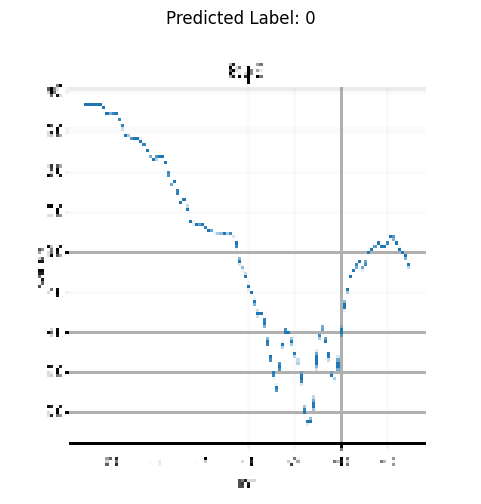

In [90]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the images from the test_data directory
test_data_dir = 'test_data'
image_files = os.listdir(test_data_dir)

# Randomly select 5 images
selected_images = random.sample(image_files, 5)

# Preprocess each selected image, make predictions, and plot
for image_file in selected_images:
    # Load and preprocess the image
    img_path = os.path.join(test_data_dir, image_file)
    img = image.load_img(img_path, target_size=(150, 150))  # Adjust target_size if needed
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values
    
    # Make prediction
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction)
    print(predicted_label)
    
    # Plot the image along with its predicted label
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(f'Predicted Label: {predicted_label}')
    plt.axis('off')
    plt.show()

In [89]:
# import os
# import random
# import numpy as np
# import matplotlib.pyplot as plt
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
# import tensorflow as tf
# from tensorflow.keras.models import Model

# # Load the model (replace 'model' with your trained CNN model)
# model = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)

# # Get list of image files in the test_data directory
# test_data_dir = 'test_data'
# image_files = os.listdir(test_data_dir)

# # Randomly select an image
# selected_image = random.choice(image_files)

# # Load the selected image
# img_path = os.path.join(test_data_dir, selected_image)
# img = image.load_img(img_path, target_size=(224, 224))  # Adjust target_size if needed
# x = image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = preprocess_input(x)

# # Get the prediction
# preds = model.predict(x)
# predicted_class = np.argmax(preds[0])
# print('Predicted class:', predicted_class)
# print('Predicted class name:', decode_predictions(preds)[0][0][1])

# # Get the output of the last convolutional layer
# last_conv_layer = model.get_layer('block5_conv3')

# # Create a model that maps the input image to the activations of the last conv layer
# grad_model = Model(inputs=model.inputs, outputs=[last_conv_layer.output, model.output])

# # Compute the gradient of the predicted class with respect to the output feature map of the last conv layer
# with tf.GradientTape() as tape:
#     conv_output, preds = grad_model(x)
#     loss = preds[:, predicted_class]

# grads = tape.gradient(loss, conv_output)[0]

# # Compute the guided gradients
# guided_grads = tf.cast(conv_output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

# # Compute the average gradients across each feature map
# weights = tf.reduce_mean(guided_grads, axis=(0, 1))

# # Compute the weighted sum of the feature maps
# cam = tf.reduce_sum(tf.multiply(weights, conv_output), axis=-1)

# # Resize the CAM to match the original image size
# heatmap = tf.image.resize(cam, (img.shape[1], img.shape[0]))

# # Normalize the heatmap
# heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

# # Convert the heatmap to numpy array
# heatmap = heatmap.numpy()

# # Plot the original image
# plt.imshow(img)
# plt.title('Original Image')
# plt.axis('off')
# plt.show()

# # Plot the heatmap on top of the original image
# plt.imshow(img)
# plt.imshow(heatmap, alpha=0.5, cmap='jet')
# plt.title('Grad-CAM Heatmap')
# plt.axis('off')
# plt.show()